<a href="https://colab.research.google.com/github/siddhi5386/Emotion-Recognition-from-brain-EEG-signals-/blob/master/Emotion_recognition_from_brain_signals_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-7it4j0lz
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-7it4j0lz
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28132 sha256=8a2081360bf9f90faa8986a441a7a737ce360460d8c9e960624e3c7e933890b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-w2p2vwy6/wheels/3b/4c/23/f148efd24c82659379aad76057fe18bfe4161d81bd44c080cb
Successfully built pyeeg


In [ ]:
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
os.getcwd()
os.chdir('/content/drive/My Drive')

In [ ]:
channel = [1,2,3,4,6,11,13,17,19,20,21,25,29,31]  #14 Channels chosen to fit Emotiv Epoch+
band = [4,8,12,16,25,45]                          #5 bands
window_size = 256                                 #Averaging band power of 2 sec
step_size = 16                                    #Each 0.125 sec update once
sample_rate = 128                                 #Sampling rate of 128 Hz
subjectList = ['01','02','03']                    #List of subjects

# Fast Fourier Transformation to Extract Features
Run only once for all models

In [ ]:
# def FFT_Processing (sub, channel, band, window_size, step_size, sample_rate):
#     '''
#     arguments:  string subject
#                 list channel indice
#                 list band
#                 int window size for FFT
#                 int step size for FFT
#                 int sample rate for FFT
#     return:     void
#     '''
#     meta = []
#     with open("/content/drive/My Drive/DEAP/results/dat/s" + sub + '.dat', 'rb') as file:

#         subject = pickle.load(file, encoding='latin1') #resolve the python 2 data problem by encoding : latin1

#         for i in range (0,40):
#             # loop over 0-39 trails
#             data = subject["data"][i]
#             labels = subject["labels"][i]
#             start = 0;

#             while start + window_size < data.shape[1]:
#                 meta_array = []
#                 meta_data = [] #meta vector for analysis
#                 for j in channel:
#                     X = data[j][start : start + window_size] #Slice raw data over 2 sec, at interval of 0.125 sec
#                     Y = pe.bin_power(X, band, sample_rate) #FFT over 2 sec of channel j, in seq of theta, alpha, low beta, high beta, gamma
#                     meta_data = meta_data + list(Y[0])

#                 meta_array.append(np.array(meta_data))
#                 meta_array.append(labels)

#                 meta.append(np.array(meta_array))    
#                 start = start + step_size
                
#         meta = np.array(meta)
#         np.save('/content/drive/My Drive/DEAP/results/dat/s' + sub, meta, allow_pickle=True, fix_imports=True)

In [ ]:
# for subjects in subjectList:
#     FFT_Processing (subjects, channel, band, window_size, step_size, sample_rate)

# Split data into training, testing and validating sets
# saved to respective .npy files

In [ ]:

data_training = []
label_training = []
data_testing = []
label_testing = []
data_validating = []
label_validating = []

for subjects in subjectList:

    with open('/content/drive/My Drive/DEAP/results/dat/s' + subjects + '.npy', 'rb') as file:
      sub = np.load(file,allow_pickle=True)
      for i in range (0,sub.shape[0]):
        if i % 10 == 0:
          data_validating.append(sub[i][0])
          label_validating.append(sub[i][1])
        elif i % 5 == 0:
          data_testing.append(sub[i][0])
          label_testing.append(sub[i][1])
        else:
          data_training.append(sub[i][0])
          label_training.append(sub[i][1])

np.save('/content/drive/My Drive/DEAP/results/data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save('/content/drive/My Drive/DEAP/results/label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)

np.save('/content/drive/My Drive/DEAP/results/data_validating', np.array(data_validating), allow_pickle=True, fix_imports=True)
np.save('/content/drive/My Drive/DEAP/results/label_validating', np.array(label_validating), allow_pickle=True, fix_imports=True)
print("validating dataset:", np.array(data_validating).shape, np.array(label_validating).shape)

np.save('/content/drive/My Drive/DEAP/results/data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save('/content/drive/My Drive/DEAP/results/label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

training dataset: (46848, 70) (46848, 4)
validating dataset: (5856, 70) (5856, 4)
testing dataset: (5856, 70) (5856, 4)


# Load training set





In [ ]:

with open('/content/drive/My Drive/DEAP/results/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open('/content/drive/My Drive/DEAP/results/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [3]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

In [ ]:
X.shape

(46848, 70)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(Z)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train.shape

(46848, 10)

In [ ]:
x_train = np.array(X[:])

# Load testing set



In [ ]:

with open('/content/drive/My Drive/DEAP/results/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open('/content/drive/My Drive/DEAP/results/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [3]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

In [ ]:
x_test = np.array(M[:])

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(L)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Load validating set


In [ ]:
with open('/content/drive/My Drive/DEAP/results/data_validating.npy', 'rb') as fileTrain:
    P  = np.load(fileTrain)
    
with open('/content/drive/My Drive/DEAP/results/label_validating.npy', 'rb') as fileTrainL:
    Q  = np.load(fileTrainL)
    
P = normalize(P)
R = np.ravel(Q[:, [3]])

Arousal_Validate = np.ravel(Q[:, [0]])
Valence_Validate = np.ravel(Q[:, [1]])
Domain_Validate = np.ravel(Q[:, [2]])
Like_Validate = np.ravel(Q[:, [3]])

In [ ]:
x_validate = np.array(P[:])

In [ ]:
from keras.utils import to_categorical
y_validate = to_categorical(R)
y_validate

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_validate.shape

(5856, 10)

# Remove the mean and scale each feature to unit variance

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_validate = scaler.fit_transform(x_validate)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
x_validate = x_validate.reshape(x_validate.shape[0],x_validate.shape[1], 1)

In [ ]:
x_train.shape

(46848, 70, 1)

# Train model

In [ ]:
batch_size = 256
num_classes = 10
epochs = 200
input_shape=(x_train.shape[1], 1)

In [ ]:
# 70 features
print(input_shape)

(70, 1)


In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [ ]:
model = Sequential()
intput_shape=(x_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 70, 128)           512       
                                                                 
 batch_normalization (BatchN  (None, 70, 128)          512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 35, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 35, 128)           49280     
                                                                 
 batch_normalization_1 (Batc  (None, 35, 128)          512       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,  
          verbose=1,validation_data=(x_validate,y_validate))

Epoch 1/200
183/183 [==============================] - 11s 12ms/step - loss: 1.8220 - accuracy: 0.3008 - val_loss: 1.5773 - val_accuracy: 0.3772
Epoch 2/200
183/183 [==============================] - 2s 9ms/step - loss: 1.5068 - accuracy: 0.4033 - val_loss: 1.3519 - val_accuracy: 0.4670
Epoch 3/200
183/183 [==============================] - 2s 9ms/step - loss: 1.3567 - accuracy: 0.4689 - val_loss: 1.1718 - val_accuracy: 0.5470
Epoch 4/200
183/183 [==============================] - 2s 9ms/step - loss: 1.2420 - accuracy: 0.5188 - val_loss: 1.0576 - val_accuracy: 0.5955
Epoch 5/200
183/183 [==============================] - 2s 10ms/step - loss: 1.1339 - accuracy: 0.5692 - val_loss: 0.9579 - val_accuracy: 0.6455
Epoch 6/200
183/183 [==============================] - 2s 9ms/step - loss: 1.0430 - accuracy: 0.6094 - val_loss: 0.8733 - val_accuracy: 0.6795
Epoch 7/200
183/183 [==============================] - 2s 9ms/step - loss: 0.9689 - accuracy: 0.6443 - val_loss: 0.7893 - val_accuracy: 0.7

# Test model with test set

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

183/183 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.8996
Test loss: 0.496450275182724
Test accuracy: 0.8995901346206665


In [ ]:
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt
import numpy


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


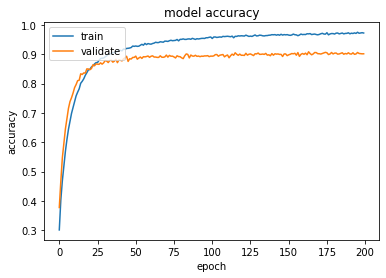

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

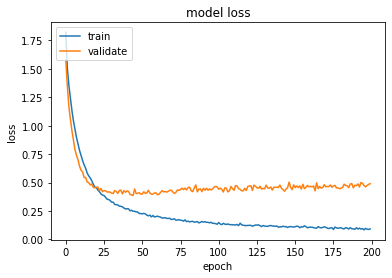

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

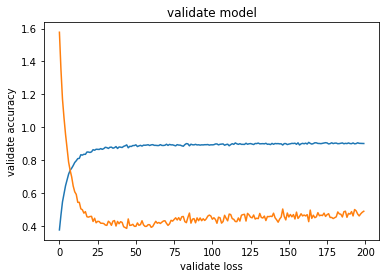

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('validate model')
plt.ylabel('validate accuracy')
plt.xlabel('validate loss')
plt.show()

In [ ]:
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
import numpy as np

183/183 [==============================] - 0s 2ms/step


In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred[1]

array([1.5929255e-32, 7.8531937e-10, 3.8385401e-33, 2.0581824e-08,
       8.2648491e-08, 1.1583530e-04, 9.9988258e-01, 1.3237134e-06,
       2.6643244e-08, 1.2101145e-07], dtype=float32)

In [ ]:
y_test1=np.argmax(y_test, axis=1)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_test1[1]

6

In [ ]:
y_pred[1]

6

In [ ]:
cmatrix=confusion_matrix(y_test1, y_pred)

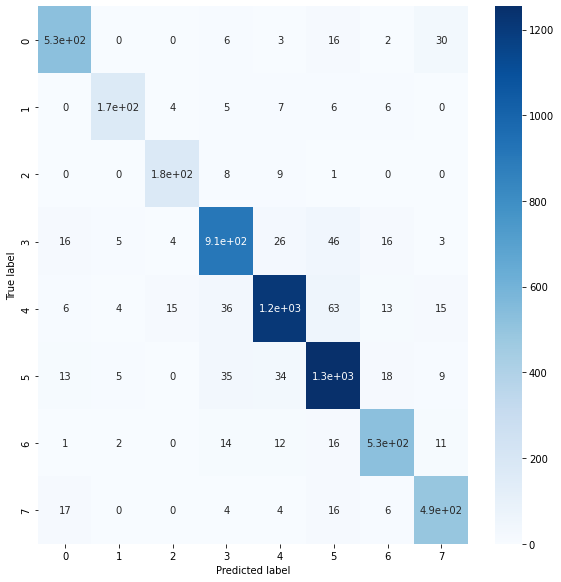

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()